In [24]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 35.2 MB/s eta 0:00:00


In [11]:
years = list(range(1950, 2024))

In [12]:
import os

for year in range(1950, 2025):
    url = f"https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/StormEvents_details-ftp_v1.0_d{year}_c20250520.csv.gz"
    os.system(f"wget {url}")

In [13]:
import pandas as pd
import glob

files = glob.glob("*.csv.gz")
dfs = [pd.read_csv(f, compression='gzip', low_memory=False) for f in files]
df_all = pd.concat(dfs, ignore_index=True)

In [14]:
df_all

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,196007,11,2141,196007,11,2141,NaN,10071755,NEBRASKA,31.0,...,0.0,NaN,NaN,41.00,-98.28,NaN,NaN,NaN,NaN,PUB
1,196006,15,2030,196006,15,2030,NaN,10071700,NEBRASKA,31.0,...,0.0,NaN,NaN,40.58,-98.40,NaN,NaN,NaN,NaN,PUB
2,196007,22,1525,196007,22,1525,NaN,10071180,MONTANA,30.0,...,0.0,NaN,NaN,46.60,-112.00,NaN,NaN,NaN,NaN,PUB
3,196003,29,1900,196003,29,1900,NaN,10018150,IOWA,19.0,...,0.0,NaN,NaN,40.78,-91.08,NaN,NaN,NaN,NaN,PUB
4,196005,5,1550,196005,5,1550,NaN,10093963,OKLAHOMA,40.0,...,0.0,NaN,NaN,35.12,-97.05,35.25,-96.97,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879788,202402,1,0,202402,20,600,189164.0,1163394,MISSISSIPPI,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exceptional (D4) drought conditions and Extrem...,Extreme drought (D3) conditions improved by th...,CSV
1879789,202402,1,0,202402,13,600,189164.0,1163396,MISSISSIPPI,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exceptional (D4) drought conditions and Extrem...,Severe drought (D2) conditions improved by mid...,CSV
1879790,202402,1,0,202402,13,600,189164.0,1163398,MISSISSIPPI,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exceptional (D4) drought conditions and Extrem...,Severe drought (D2) conditions improved by mid...,CSV
1879791,202402,1,0,202402,6,600,189164.0,1163403,MISSISSIPPI,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exceptional (D4) drought conditions and Extrem...,Severe drought (D2) conditions improved early ...,CSV


In [17]:
df_floods = df_all[df_all['EVENT_TYPE'].str.contains('Flood', case=False)]
df_floods[df_floods['STATE'] == 'TEXAS']

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
10847,199707,28,1330,199707,28,1500,2067022.0,5611127,TEXAS,48.0,...,NaN,NaN,ALPINE,NaN,NaN,NaN,NaN,NaN,Training cells in the Alpine area caused heavy...,PDC
11066,199708,8,715,199708,9,715,2067755.0,5610772,TEXAS,48.0,...,NaN,NaN,TENAHA,NaN,NaN,NaN,NaN,NaN,Excessive rains of over one foot in 24 hours l...,PDC
11088,199708,7,715,199708,7,715,2067753.0,5610769,TEXAS,48.0,...,1.0,W,NACOGDOCHES,NaN,NaN,NaN,NaN,NaN,Water rose rapidly west of town with nearly si...,PDC
11089,199708,9,1004,199708,9,1800,2067757.0,5610775,TEXAS,48.0,...,NaN,NaN,CENTER,NaN,NaN,NaN,NaN,NaN,Nearly eleven inches of rain led to the closur...,PDC
11650,199707,7,900,199707,7,1200,2065520.0,5607802,TEXAS,48.0,...,NaN,NaN,RED SPGS,NaN,NaN,NaN,NaN,NaN,A home was flooded on FM16 suffering moderate ...,PDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878549,202411,7,2345,202411,7,2345,198091.0,1224878,TEXAS,48.0,...,0.0,W,SAN ANGELO,31.4699,-100.4320,31.4700,-100.4319,The combination of an upper level storm system...,Public reported on social media that there was...,CSV
1878550,202411,8,31,202411,8,31,198091.0,1224879,TEXAS,48.0,...,2.0,S,SAN ANGELO,31.4416,-100.4347,31.4416,-100.4348,The combination of an upper level storm system...,Public reported that there was water over Irvi...,CSV
1878593,202409,11,200,202409,11,1200,196913.0,1218069,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,While Hurricane Francine passed well south of ...,The tide levels at Sabine Pass/Texas Point rea...,CSV
1878748,202411,8,732,202411,8,732,198091.0,1224880,TEXAS,48.0,...,7.0,NNW,MERETA,31.5416,-100.1785,31.5425,-100.1791,The combination of an upper level storm system...,Law enforcement reported FM 1692 was flooded a...,CSV


In [18]:
df_floods[df_floods['STATE'] == 'TEXAS'].columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [19]:
import pandas as pd
import numpy as np
import xarray as xr

# Filter for Texas
df_tx = df_floods[df_floods['STATE'] == 'TEXAS'].copy()

# Parse time and drop rows with missing lat/lon
df_tx['YEAR'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME'], errors='coerce').dt.year
df_tx = df_tx.dropna(subset=['BEGIN_LAT', 'BEGIN_LON', 'YEAR'])

# Round lat/lon to 0.25° grid
df_tx['lat_bin'] = (df_tx['BEGIN_LAT'] // 0.25) * 0.25
df_tx['lon_bin'] = (df_tx['BEGIN_LON'] // 0.25) * 0.25

# Group by grid and year, count events
event_counts = df_tx.groupby(['YEAR', 'lat_bin', 'lon_bin']).size().reset_index(name='event_count')

# Get unique coordinates and years
years = np.sort(event_counts['YEAR'].unique())
lats = np.sort(event_counts['lat_bin'].unique())
lons = np.sort(event_counts['lon_bin'].unique())

# Initialize empty 3D array
grid = np.zeros((len(years), len(lats), len(lons)))

# Fill the grid
lat_idx = {lat: i for i, lat in enumerate(lats)}
lon_idx = {lon: i for i, lon in enumerate(lons)}
year_idx = {year: i for i, year in enumerate(years)}

for _, row in event_counts.iterrows():
    y, lat, lon, count = int(row['YEAR']), row['lat_bin'], row['lon_bin'], row['event_count']
    grid[year_idx[y], lat_idx[lat], lon_idx[lon]] = count

# Convert to xarray
ds = xr.Dataset(
    {
        'flood_event_count': (['year', 'lat', 'lon'], grid)
    },
    coords={
        'year': years,
        'lat': lats,
        'lon': lons
    }
)

ds

/tmp/ipython-input-19-3655485010.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_tx['YEAR'] = pd.to_datetime(df_tx['BEGIN_DATE_TIME'], errors='coerce').dt.year
/tmp/ipython-input-19-3655485010.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tx['lat_bin'] = (df_tx['BEGIN_LAT'] // 0.25) * 0.25
/tmp/ipython-input-19-3655485010.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

<xarray.Dataset> Size: 417kB
Dimensions:            (year: 22, lat: 43, lon: 55)
Coordinates:
  * year               (year) int32 88B 2001 2003 2004 2005 ... 2022 2023 2024
  * lat                (lat) float64 344B 25.75 26.0 26.25 ... 35.75 36.0 36.25
  * lon                (lon) float64 440B -106.8 -106.5 -106.2 ... -93.5 -93.25
Data variables:
    flood_event_count  (year, lat, lon) float64 416kB 0.0 0.0 0.0 ... 0.0 0.0

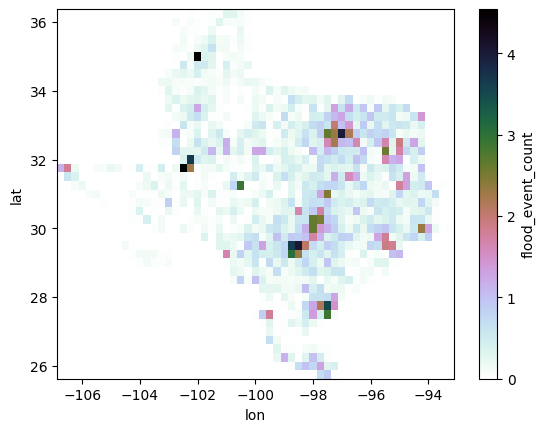

In [23]:
ds.flood_event_count.mean(dim='year').plot(cmap='cubehelix_r')

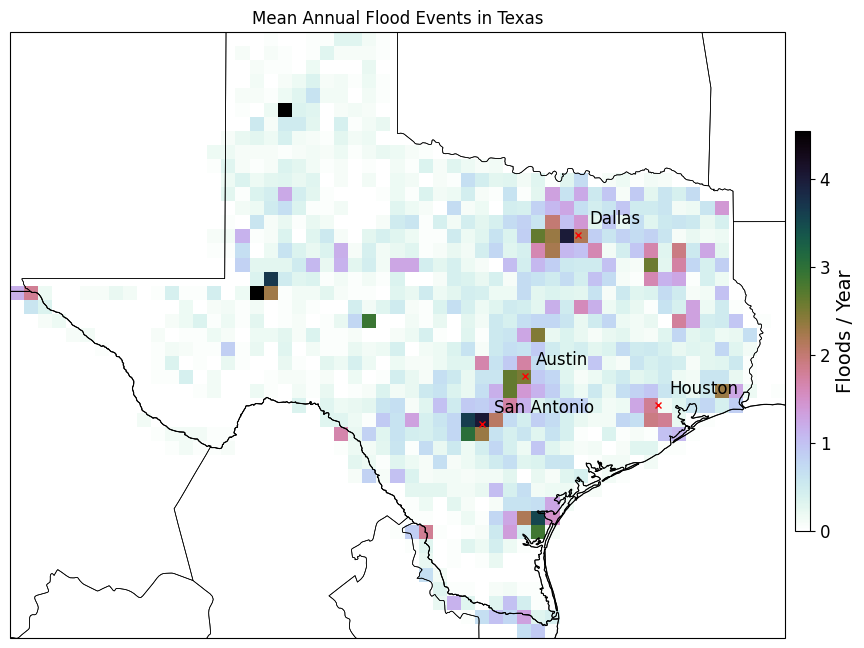

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Coordinates for cities
cities = {
    'Austin': (30.2672, -97.7431),
    'Dallas': (32.7767, -96.7970),
    'San Antonio': (29.4241, -98.4936),
    'Houston': (29.7604, -95.3698)
}

# Compute mean across years
mean_floods = ds.flood_event_count.mean(dim='year')

# Create figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Plot the data and suppress default colorbar
im = mean_floods.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='cubehelix_r',
    add_colorbar=False
)

# Manually add smaller colorbar
cax = fig.add_axes([0.91, 0.25, 0.015, 0.5])  # [left, bottom, width, height]
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('Floods / Year', fontsize=14)

cbar.ax.tick_params(labelsize=12)

# Add geographic features
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.STATES, linewidth=0.5)
ax.coastlines(resolution='10m', linewidth=0.8)

# Plot and label each city
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, 'x', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.2, lat + 0.2, city, fontsize=12, color='black', transform=ccrs.PlateCarree())

# Title
ax.set_title('Mean Annual Flood Events in Texas')
plt.show()

In [35]:
df_all['EVENT_TYPE'].unique()

array(['Thunderstorm Wind', 'Tornado', 'Hail', 'Flash Flood',
       'Heavy Rain', 'Lightning', 'Heat', 'Funnel Cloud', 'Flood',
       'Strong Wind', 'High Wind', 'Cold/Wind Chill', 'Waterspout',
       'Hurricane (Typhoon)', 'Drought', 'Debris Flow', 'Wildfire',
       'Rip Current', 'Coastal Flood', 'Winter Storm', 'Winter Weather',
       'Blizzard', 'Heavy Snow', 'High Surf', 'Dust Storm', 'Sleet',
       'Storm Surge/Tide', 'Ice Storm', 'Lake-Effect Snow', 'Dense Fog',
       'Dust Devil', 'Frost/Freeze', 'Avalanche', 'Astronomical Low Tide',
       'Marine High Wind', 'Tropical Storm', 'Volcanic Ash',
       'Marine Thunderstorm Wind', 'Marine Hail', 'Dense Smoke',
       'Tsunami', 'Extreme Cold/Wind Chill', 'Marine Strong Wind',
       'Seiche', 'Freezing Fog', 'Lakeshore Flood', 'Excessive Heat',
       'Northern Lights', 'Tropical Depression', 'Sneakerwave',
       'Marine Tropical Storm', 'Marine Dense Fog',
       'Marine Hurricane/Typhoon', 'Volcanic Ashfall',
       'Mar